# Analyzing Movie Reviews; Basic Statistics

Using data from FiveThirtyEight, both user and critic ratings from RottenTomatoes, Metacritic, IMDB, and Fandango.

In [1]:
# Reading in the data
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')

In [2]:
# Display the dataframe
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


Now I'm going to do some basic exploration of the Metacritic and Fandango critic ratings to see how they differ. First up is just to plot a couple histograms of the normalized (0 to 5) scores.

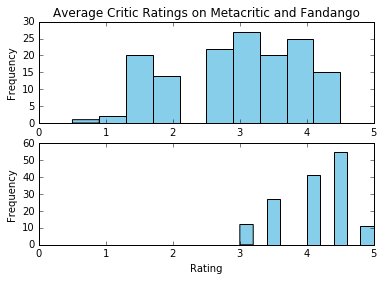

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
fig, ax = plt.subplots(nrows=2)
ax[0].hist(movies['Metacritic_norm_round'], color='skyblue')
ax[1].hist(movies['Fandango_Stars'], color='skyblue')
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[1].set_xlabel("Rating")
ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")
ax[0].set_title("Average Critic Ratings on Metacritic and Fandango")
plt.show()


So, it seems pretty obvious just from looking at these histograms that there is some serious bias in Fandango's ratings. There are no movies rated lower than 3 out of 5, and about 10 movies were given the max of 5. Compare this with Metacritic, where the ratings range from about 0.5 to 4.5, with no movies getting a perfect score. There is a clear bias in Fandango's ratings.

## Basic Summary Statistics

In [4]:
print('Mean Fandango Rating:',movies['Fandango_Stars'].mean())
print('Mean Metacritic Rating:',movies['Metacritic_norm_round'].mean())

print('Median Fandango Rating:',movies['Fandango_Stars'].median())
print('Median Metacritic Rating:',movies['Metacritic_norm_round'].median())

Mean Fandango Rating: 4.08904109589
Mean Metacritic Rating: 2.97260273973
Median Fandango Rating: 4.0
Median Metacritic Rating: 3.0


The mean rating on Fandango is over a full point higher than Metacritic and the median is one point higher for Fandango, lending some more evidence to what we saw in the histograms. Let's look at the standar deviations - is there more variability in Metacritic?

In [5]:
import numpy as np
print('Standard deviation of Fandango scores:', movies['Fandango_Stars'].std())
print('Standard deviation of Metacritic scores:',movies['Metacritic_norm_round'].std())

Standard deviation of Fandango scores: 0.540385977979
Standard deviation of Metacritic scores: 0.990960561374


So, again just confirming what we saw in the histogram. The metacritic scores have nearly twice as much variability as the Fandango scores. Let's look at a scatter plot of Metacritic versus Fandango to see where these big discrepancies are.

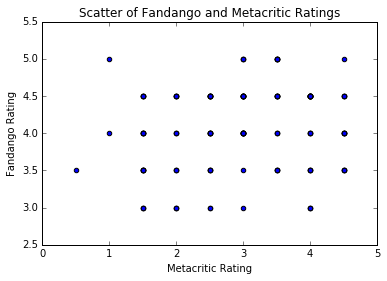

In [6]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.xlim(0,5)
plt.xlabel('Metacritic Rating')
plt.ylabel('Fandango Rating')
plt.title('Scatter of Fandango and Metacritic Ratings')
plt.show()

There isn't a whole ton of useful information we can glean from this scatterplot. We can see there are some odd movies - for instance there is one that got a 1 from Metacritic but a 5 on Fandango. A useful way of taking a look at this might be to look at difference scores - let's see which movies have the largest discrepancies between Fandango and Metacritic.

In [7]:
# Compute the difference score
movies['fm_diff'] = np.abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])

# Sort the data by difference scores, print the top 5.
movies.sort_values('fm_diff', ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


So, we can see the top five movies with the biggest absolute discrepancies between Metacritic and Fandango are "Do you Believe?," "Little Boy," "Annie," "Pixels," and "The Longest Ride." "Do you Believe?" is the aforementioned movie that got a 1 from Metacritic, but a 5 from Fandango.

## Basic Inferential Statistics

Is there a correlation between Fandango and Metacritic, despite these seemingly stark differences on some movies?

In [8]:
import scipy.stats

scipy.stats.pearsonr(movies['Metacritic_norm_round'], movies['Fandango_Stars'])


(0.17844919073895918, 0.031161516228523815)

The scipy.stats.pearsonr function gives us the correlation and the p-value. So, with alpha set at .05, we can say that the two ratings system are indeed correlated (r = .18, p = .03). However, they are not correlated very strongly. Taken with all the evidence we've seen so far, I think this suggests that Fandango has poor ratings. For instance, see the correlation between Metacritic and Rotten Tomatoes:

In [34]:
scipy.stats.pearsonr(movies['Metacritic_norm_round'], movies['RT_norm'])

(0.69239971524852129, 3.6790164377924433e-22)

Metacritic and Rotten Tomatoes are highly correlated (r = .95, p < .001). One might even say they are measuring the same thing.

Let's run a quick regression to predict Fandango ratings based on Metacritic Ratings.

In [10]:
scipy.stats.linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])

LinregressResult(slope=0.097311077973928267, intercept=3.7997739188994188, rvalue=0.17844919073895882, pvalue=0.031161516228524384, stderr=0.04471354465679829)

The output of the regression gives us the correlation and p-value again, plus this time the slope and intercept. We can use this slope and intercept to predict values of y (Fandango Ratings) based on values of x (Metacritic Ratings).

The value of the intercept tells us that when Metacritic ratings are 0, the Fandango rating is 3.80. The value of the slope tells us that for every 1 point increase in rating on Metacritic, there is 0.10 point rating increase on Fandango. Let's quickly use these values to predict what a movie that got 3.0 on Metacritic would get on Fandango.

To do this we just plug the slope and intercept values into a basic regression equation, y = mx + b, where 'm' is our target value (3), x is the slope, and b is the intercept.

In [11]:
pred_3 = 3*0.097311077973928267 + 3.7997739188994188
print(pred_3)

4.091707152821204


So, this simple linear regression predicts that a movie that got 3.0 on Metacritic would get a 4.0 on Fandango. This is directly in line with the difference in measures of central tendency we've already observed. Let's quickly calculate the Fandango ratings predictions for Metacritic ratings of 1 and 5.

In [12]:
pred_1 = 1*0.097311077973928267 + 3.7997739188994188
pred_5 = 5*0.097311077973928267 + 3.7997739188994188

print(pred_1)
print(pred_5)

3.897084996873347
4.28632930876906


So here is where you can see more evidence of Fandango's ratings being so skewed. Our simple linear regression predicts Fandango ratings of 3.9 and 4.3 for Metacritic ratings of 1 and 5 respectively.

This suggests to me the simple linear algorithm might not be working all that well. It might be biased by a few of the big discrepancy outliers.

Let's visualize the regression a little bit better, by plotting out the regression line on top of the not-so-useful scatter of Metacritic vs. Fandango ratings from before. Here, given the regression is linear, we're just going to plot the slope line as having a slope that is the difference between pred_1 and pred_5 from above (the two most extreme points. 

What you'll notice in the plot below, is that the line passes through 0 right around the calculated slope from our original regression equation (~3.79).

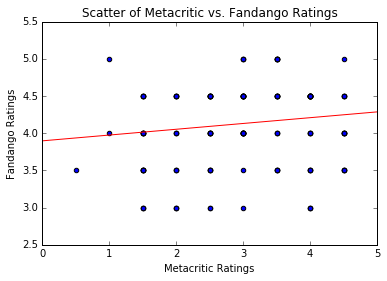

In [33]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([0,5],[pred_1,pred_5], color='red')
plt.xlim(0,5)
plt.xlabel('Metacritic Ratings')
plt.ylabel('Fandango Ratings')
plt.title('Scatter of Metacritic vs. Fandango Ratings')
plt.show()

# Conclusion

In this basic analysis we plotted out and explored the relationship between average movie ratings from both Fandango and Metacritic. It appears from a visual peek at the histograms, and a calculation of summary statistics, that Fandango has positively biased movie ratings and less variation in their ratings.

Moreover, Fandango's ratings do not correlate strongly with Metacritics ratings, compared with Metacritic and Rotten Tomatoes which correlate nearly perfectly.

A linear regression shows the predicted Fandango ratings based solely off Metacritic ratings, but I don't think this model can predict Fandango ratings well, given that Fandango ratings do not correlate strongly with Metacritic ratings. 